In [1]:
import torch
%run -i "./utils/loader.py"
%run -i "./utils/train_load_model.py"
%run -i "./utils/noise.py"

In [2]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
save_path = 'cachedModels'
cuda

False

## 1.1 Train Model on Data (MNIST, FashionMNIST)

In [3]:
import torchvision.transforms as transforms
import os
# Train MNIST Model
dataset_name = "MNIST"
print(dataset_name,"Model Training")
print("*"*30)
train_mnist_dataset, test_mnist_dataset, train_mnist_loader, test_mnist_loader = \
                    get_loader(dataset_name, transforms.ToTensor(), cuda, True)
trained = len(os.listdir("cachedModels"))>=4
if trained == False:
    print("Training Model 1")
    train_model("model1",train_mnist_loader, test_mnist_loader,save_path,cuda,dataset_name,EPOCHS = 5)
    print("*"*30)
    print("Training Model 2")
    train_model("model2",train_mnist_loader, test_mnist_loader,save_path,cuda,dataset_name,EPOCHS = 5)

## Train Fashion MNIST Model
dataset_name = "FASHION"
print(dataset_name,"Model Training")
train_fashion_dataset, test_fashion_dataset, train_fashion_loader, test_fashion_loader = \
                    get_loader(dataset_name, transforms.ToTensor(), cuda, True)
if trained == False:
    print("Training Model 1")
    train_model("model1",train_fashion_loader, test_fashion_loader,save_path,cuda,dataset_name,EPOCHS = 5)
    print("*"*30)
    print("Training Model 2")
    train_model("model2",train_fashion_loader, test_fashion_loader,save_path,cuda,dataset_name,EPOCHS = 5)

MNIST Model Training
******************************
FASHION Model Training


## 1.2 Load Models

In [4]:
mnist_model1, mnist_model2, fashion_model1, fashion_model2 = load_model(save_path)

## 2.1 Exploration on Model's Bais on Randomly Generated White Noise

In [5]:
noise, noisy_image_summary = generate_white_noise(mnist_model2, iteration = int(1e3), batch_size = int(1e3), image_size = 28, cuda=cuda)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:34<00:00, 10.58it/s]


<IPython.core.display.Javascript object>


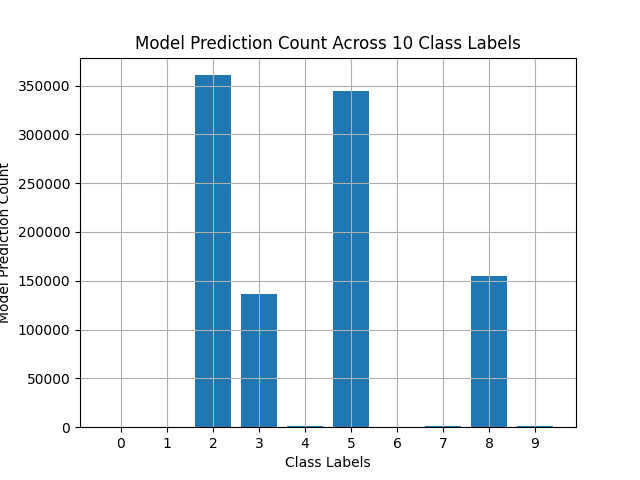

{0: tensor(13), 1: tensor(44), 2: tensor(360577), 3: tensor(136537), 4: tensor(861), 5: tensor(344496), 6: tensor(17), 7: tensor(1151), 8: tensor(155295), 9: tensor(1009)}


In [12]:
%matplotlib notebook
visualize_noise_summary(noisy_image_summary)
print(noisy_image_summary)

<IPython.core.display.Javascript object>


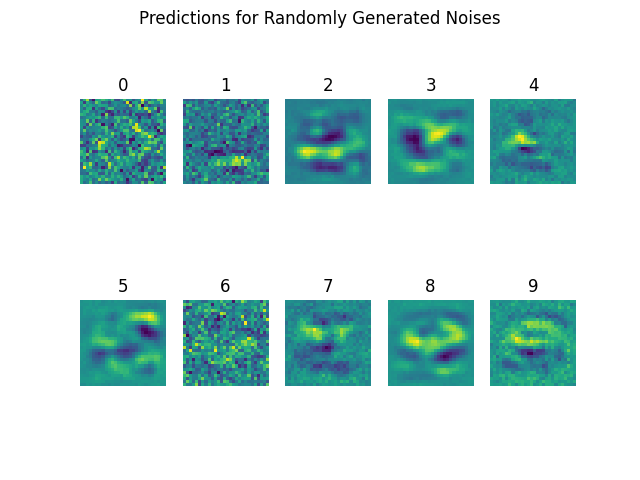

In [13]:
%matplotlib notebook
visualize_noise(noise)

## 2.2 Generate Embedded Noise

In [17]:
noise_maps = generate_embedded_noise(mnist_model1, test_mnist_dataset, 0.6, int(10), int(1e4), 28, cuda)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.05it/s]


<IPython.core.display.Javascript object>


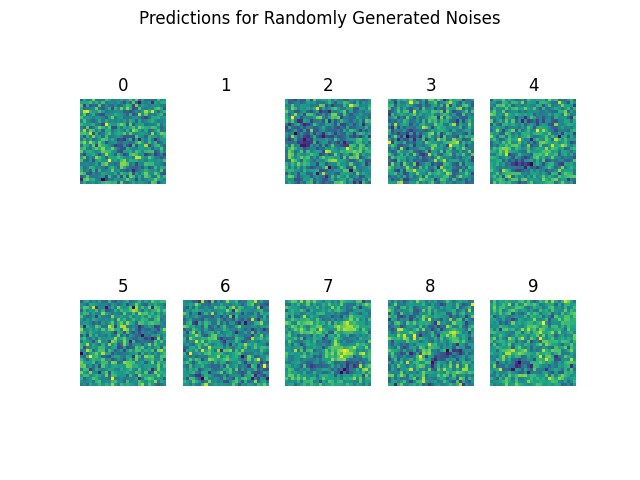

In [18]:
%matplotlib notebook
visualize_noise(noise_maps, embedded=True)